this is a pig healthy/ill classification test

In [1]:
import copy, pathlib, math
import PIL.Image as Image

import sklearn
import numpy
import matplotlib
import matplotlib.pyplot as plt

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", numpy.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.3.0
numpy version: 1.24.3
matplotlib version: 3.7.2



In real life the data provisioning phase is likely to include more steps about data sourcing and data quality, however for demo purposes in this notebook it is restricted to merely loading the images from the `data` folder, without any concern over quantity nor quality.

The code below will load the images and understand that the subfolder names are the class labels. It is important that all the images are the same size (and in this case square as well) so this code will automatically resize them. If high resolution images are available the `size` parameter can be increased and it will probably improve the performance slightly, at significantly increased training time. The given size of 256 is a middle way which is supposed to give fair results at a reasonable training time.

In [2]:
size = 256

def load_image(file, size):
    img = Image.open(file)
    img = img.resize((size, size))
    return numpy.array(img).flatten()

def load_labelled_images(path, size):
    labels = list()
    files = list()
    for file_info in [x for x in pathlib.Path(path).glob("**/*.jpg")]:
        labels.append(file_info.parts[1])
        files.append(str(file_info))
    imgs = numpy.array([load_image(f, size) for f in files])
    return imgs, numpy.array(labels)      

images, labels = load_labelled_images("./data", size)
print("Loaded", len(images), "images in the following", len(numpy.unique(labels)), "classes:")
for label in numpy.unique(labels):
    print(label)

Loaded 24510 images in the following 10 classes:
Healthy
Infected_Bacterial_Erysipelas
Infected_Bacterial_Greasy_Pig_Disease
Infected_Environmental_Dermatitis
Infected_Environmental_Sunburn
Infected_Fungal_Pityriasis_Rosea
Infected_Fungal_Ringworm
Infected_Parasitic_Mange
Infected_Viral_Foot_and_Mouth_Disease
Infected_Viral_Swinepox



Given that this case uses images, there is no such thing as feature selection because one cannot select some pixels to be better indicators than other pixels beforehand. Therefore, there is little to do in terms of preprocessing other than splitting the dataset into a trainset and testset.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=0)



In this step the model will be fitted with the trainset only. In this case a [Support Vector Machine for classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [7]:
from sklearn.svm import SVC
from tqdm import tqdm
import numpy as np

# Example dataset
X_test = np.random.rand(20, 256, 256, 3)  # Generate random "images"
y_train = np.random.randint(0, 2, 100)
X_test = np.random.rand(20, 10)
y_test = np.random.randint(0, 2, 20)

# Initialize model
model = SVC(probability=True)

# Simulated progress bar
with tqdm(total=100, desc="Training Progress") as pbar:
    for i in range(100):  # Simulate incremental progress
        # Perform a portion of the training process or simply update the bar
        # (SVC does not support incremental updates inherently)
        pbar.update(1)

# Fit the model (actual training happens here)
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("Accuracy:", score)


Training Progress: 100%|██████████| 100/100 [00:00<?, ?it/s]


ValueError: Found input variables with inconsistent numbers of samples: [17157, 100]

In [6]:
predictions = model.predict(X_test)
correct = predictions == y_test
accuracy = correct.sum() / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


NameError: name 'model' is not defined

In [ ]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)


ValueError: Found array with dim 4. SVC expected <= 2.

in the step below you can test 1 image against the newly made model

In [57]:
from IPython.display import display
from ipywidgets import FileUpload
import numpy as np
from PIL import Image

# Set upload size to match model's input size
upload_size = 256

# File upload widget
uploader = FileUpload(accept='image/*', multiple=False)
display(uploader)

def preprocess_and_classify_image(uploaded_file):
    # Open and resize the image
    img = Image.open(uploaded_file)
    img = img.resize((upload_size, upload_size))
    img_data = np.array(img).flatten().reshape(1, -1)  # Flatten and reshape for model input
    
    # Use the trained model (assumes a variable `model` is defined in the notebook)
    prediction = model.predict(img_data)[0]  # Predict and get the class label
    



FileUpload(value=(), accept='image/*', description='Upload')

upoad an image and run the next box of code

In [69]:
from io import BytesIO

def preprocess_and_classify_image(uploaded_file):
    # Wrap memoryview in BytesIO
    img = Image.open(BytesIO(uploaded_file))
    img = img.resize((upload_size, upload_size))
    img_data = np.array(img).flatten().reshape(1, -1)  # Flatten and reshape for model input
    
    # Use the trained model (assumes a variable `model` is defined in the notebook)
    prediction = model.predict_proba(img_data)  # Predict and get the class label
    print(model.classes_)
    print(prediction[0])
    # Display result
    # result = "Healthy" if prediction[0] == 'healthy' else "Ill"
    # print(f"Classification Result: The pig is classified as {result}.")

if uploader.value:
    uploaded_image = uploader.value[0]['content']  # Access the first (and only) item in the tuple and get 'content'
    preprocess_and_classify_image(uploaded_image)
    print("there is an image")
else:
    print("Please upload an image to classify.")


ValueError: X has 196608 features, but SVC is expecting 10 features as input.


Below a classification report is printed. This shows for every one of the classes how well the model performed.

In [8]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: cannot reshape array of size 196608 into shape (1,1,3)

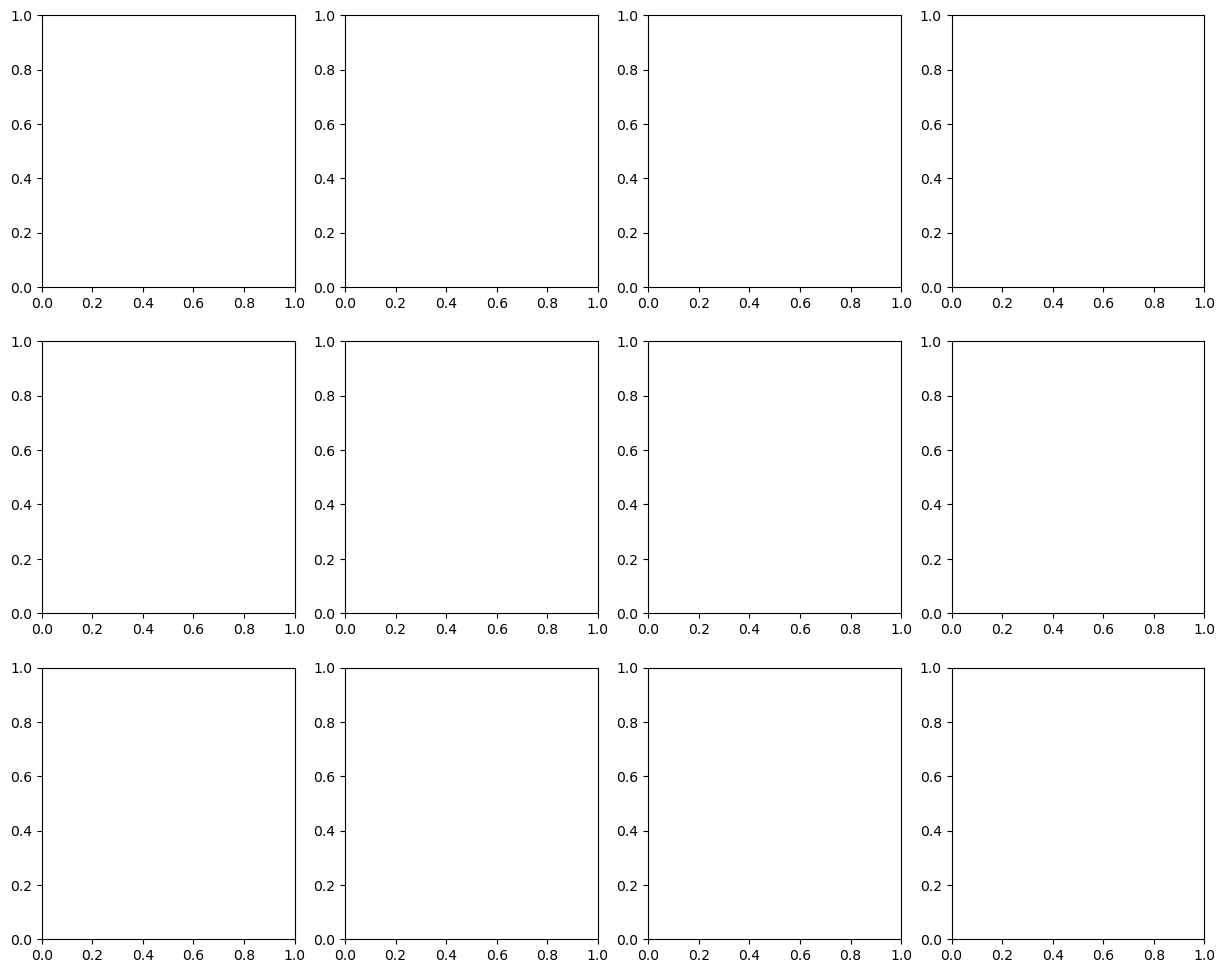

In [55]:
_, subplots = plt.subplots(nrows = math.ceil(len(X_test)/4), ncols = 4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, x in enumerate(X_test):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    subplots[i].set_title(predictions[i] + (" (correct)" if predictions[i] == y_test[i] else " (wrong)"))

below is the online version with annotated images

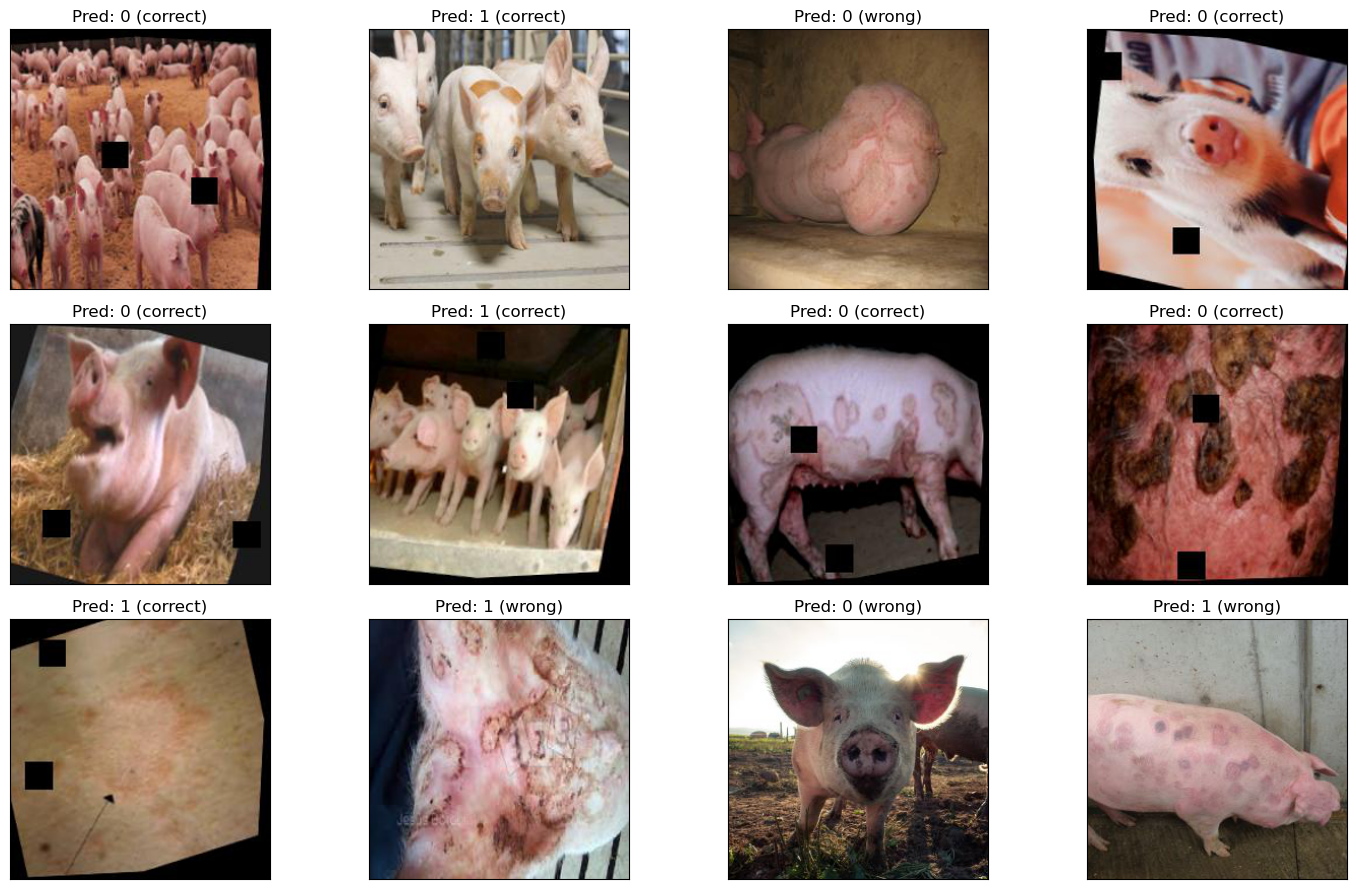

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import os

# Example: Load actual image data from a folder
image_folder = 'C:/Users/Gebruiker/Desktop/School/Minor/PigAI/implementation5/testimage'  # Replace with the path to your image folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]  # Get image filenames

# Load the images into X_test
X_test = []
for file in image_files[:20]:  # Limit to first 20 images for this example
    img = Image.open(os.path.join(image_folder, file))  # Open image
    img = img.resize((256, 256))  # Resize image to 256x256 if necessary
    img = np.array(img)  # Convert image to numpy array (shape: 256, 256, 3)
    X_test.append(img)

X_test = np.array(X_test)  # Shape: (num_images, 256, 256, 3)

# Example: Random labels and predictions (replace with actual predictions if needed)
y_test = np.random.randint(0, 2, len(X_test))
predictions = np.random.randint(0, 2, len(X_test))

# Set up the grid size for subplots
num_images = len(X_test)
columns = 4  # Number of columns per row
rows = math.ceil(num_images / columns)  # Number of rows to accommodate all images

# Create the figure and axes for subplots
fig, subplots = plt.subplots(nrows=rows, ncols=columns, figsize=(15, rows * 3))
subplots = subplots.flatten()

# Loop through each image in X_test
for i, x in enumerate(X_test):
    ax = subplots[i]
    ax.imshow(x)  # Directly display the image (RGB format)
    ax.set_xticks([])  # Remove x-ticks
    ax.set_yticks([])  # Remove y-ticks
    ax.set_title(f"Pred: {predictions[i]} (correct)" if predictions[i] == y_test[i] else f"Pred: {predictions[i]} (wrong)")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


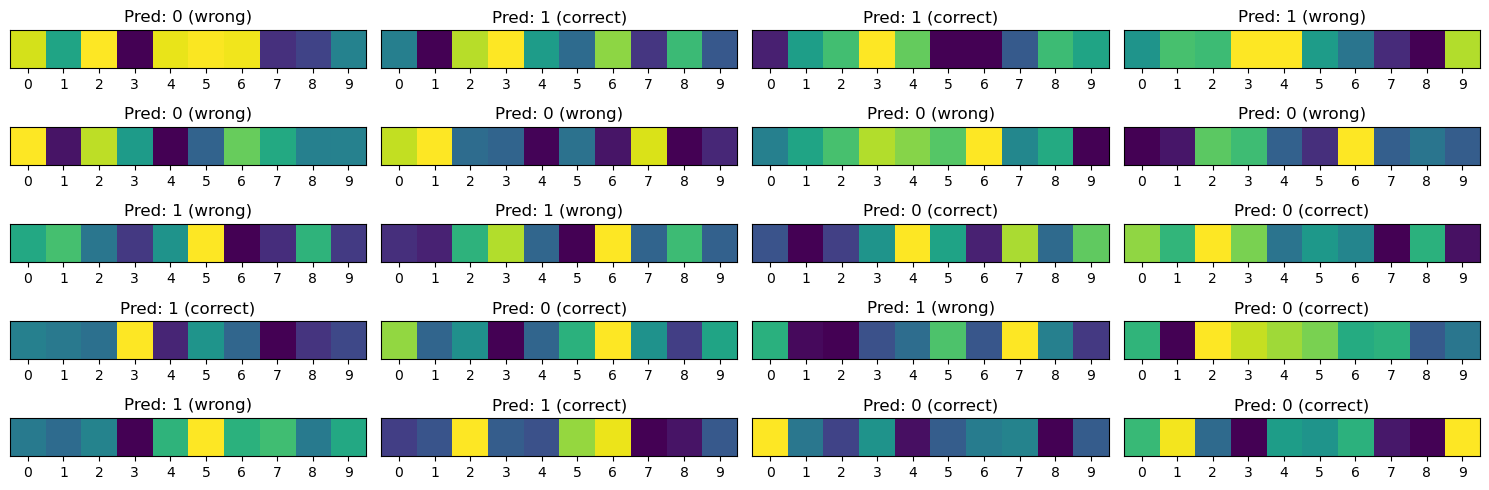

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Example: feature vectors of shape (20, 10)
X_test = np.random.rand(20, 10)  # Random dataset with 10 features for each sample
y_test = np.random.randint(0, 2, 20)
predictions = np.random.randint(0, 2, 20)  # Random predictions for demonstration

# Create the plot
_, subplots = plt.subplots(nrows=math.ceil(len(X_test) / 4), ncols=4, figsize=(15, len(X_test) // 4))
subplots = subplots.flatten()

# Visualize the feature vectors using a heatmap
for i, x in enumerate(X_test):
    # Reshape to (1, 10) for visualization as a heatmap (e.g., representing each feature)
    subplots[i].imshow(np.expand_dims(x, axis=0), aspect='auto', cmap='viridis')
    subplots[i].set_xticks(range(10))
    subplots[i].set_yticks([])  # No need to display y-axis
    subplots[i].set_title(f"Pred: {predictions[i]} (correct)" if predictions[i] == y_test[i] else f"Pred: {predictions[i]} (wrong)")

plt.tight_layout()
plt.show()
